<a href="https://colab.research.google.com/github/B21-CAP0363/Flood_prediction/blob/main/B21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import joblib

In [ ]:
data = pd.read_csv('B21.csv',sep=';')
data

,Tanggal,Kemayoran_Tn,Kemayoran_Tx,Kemayoran_Tavg,Kemayoran_RH_avg,Kemayoran_RR,Kemayoran_ss,Kemayoran_ff_x,Kemayoran_ddd_x,Kemayoran_ff_avg,Kemayoran_ddd_car,TJP_Tn,TJP_Tx,TJP_Tavg,TJP_RH_avg,TJP_RR,TJP_ss,TJP_ff_x,TJP_ddd_x,TJP_ff_avg,TJP_ddd_car,Bogor_Tn,Bogor_Tx,Bogor_Tavg,Bogor_RH_avg,Bogor_RR,Bogor_ss,Bogor_ff_x,Bogor_ddd_x,Bogor_ff_avg,Bogor_ddd_car,status_banjir
0,07-02-2021,25.8,30.2,27.8,82,67.8,7.6,8,350,3,C,25.0,30.4,28.4,81,20.0,8.3,7,330,4,NW,NaN,27.5,24.0,95.0,25.9,4.7,4.0,315.0,2.0,C,0
1,08-02-2021,25.0,30.2,28.0,83,9.0,4.4,8,330,2,C,26.0,30.8,28.5,83,11.9,4.3,6,300,2,NW,NaN,NaN,25.5,91.0,67.7,NaN,3.0,40.0,0.0,C,0
2,09-02-2021,24.2,30.2,27.2,87,16.5,3.5,4,270,1,C,24.4,30.5,27.4,86,14.8,4.8,6,310,3,NW,NaN,29.7,25.2,90.0,14.4,1.5,4.0,350.0,0.0,C,0
3,10-02-2021,25.4,30.8,28.1,80,1.4,5.8,7,200,2,C,25.4,30.5,27.5,86,2.0,4.3,7,300,3,W,22.6,27.8,24.9,91.0,0.0,NaN,4.0,270.0,1.0,C,0
4,11-02-2021,25.8,32.0,27.6,81,8888.0,2.8,5,290,2,C,25.8,31.0,27.5,84,0.1,1.3,7,280,2,W,22.4,NaN,25.5,86.0,10.5,0.2,3.0,40.0,1.0,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,01-12-2020,26.2,34.0,29.4,70,8888.0,1.0,7,250,2,C,25.9,33.5,29.2,73,8888.0,1.0,6,260,4,W,22.5,31.9,26.7,83.0,1.7,1.3,5.0,135.0,2.0,SE,0
212,02-12-2020,NaN,33.8,29.4,70,NaN,5.0,6,330,2,NW,27.1,33.8,29.6,75,0.0,8.1,5,300,2,NW,23.2,33.2,28.5,74.0,NaN,6.3,4.0,330.0,1.0,C,0
213,03-12-2020,24.4,30.4,26.9,79,5.0,7.5,4,320,1,C,24.5,29.4,26.7,84,41.4,7.8,4,350,2,W,22.2,30.0,25.3,87.0,9.2,9.4,3.0,240.0,1.0,C,0
214,04-12-2020,24.4,32.4,27.8,80,1.4,0.3,4,310,1,C,24.2,31.7,27.9,84,2.2,0.0,6,270,3,W,NaN,31.0,26.8,76.0,12.2,1.0,5.0,320.0,2.0,C,0


In [ ]:
data.isnull().sum()

Tanggal               0
Kemayoran_Tn          7
Kemayoran_Tx          0
Kemayoran_Tavg        0
Kemayoran_RH_avg      0
Kemayoran_RR         28
Kemayoran_ss          2
Kemayoran_ff_x        0
Kemayoran_ddd_x       0
Kemayoran_ff_avg      0
Kemayoran_ddd_car     0
TJP_Tn               19
TJP_Tx               15
TJP_Tavg              0
TJP_RH_avg            0
TJP_RR               30
TJP_ss                4
TJP_ff_x              0
TJP_ddd_x             0
TJP_ff_avg            0
TJP_ddd_car           0
Bogor_Tn             48
Bogor_Tx             33
Bogor_Tavg           26
Bogor_RH_avg         26
Bogor_RR             40
Bogor_ss             16
Bogor_ff_x            5
Bogor_ddd_x           5
Bogor_ff_avg          5
Bogor_ddd_car         5
status_banjir         0
dtype: int64

It seems to be a lot of missing data, let's try to clear them

In [ ]:
data_clear=data.dropna()
data_clear


,Tanggal,Kemayoran_Tn,Kemayoran_Tx,Kemayoran_Tavg,Kemayoran_RH_avg,Kemayoran_RR,Kemayoran_ss,Kemayoran_ff_x,Kemayoran_ddd_x,Kemayoran_ff_avg,Kemayoran_ddd_car,TJP_Tn,TJP_Tx,TJP_Tavg,TJP_RH_avg,TJP_RR,TJP_ss,TJP_ff_x,TJP_ddd_x,TJP_ff_avg,TJP_ddd_car,Bogor_Tn,Bogor_Tx,Bogor_Tavg,Bogor_RH_avg,Bogor_RR,Bogor_ss,Bogor_ff_x,Bogor_ddd_x,Bogor_ff_avg,Bogor_ddd_car,status_banjir
6,13-02-2021,25.2,31.0,27.9,79,0.8,3.0,6,340,2,C,25.2,30.2,27.6,85,13.9,4.2,6,320,3,NW,21.9,29.5,25.5,88.0,9.4,4.2,4.0,330.0,1.0,C,0
7,14-02-2021,26.0,29.2,27.3,88,22.3,4.2,3,270,1,C,25.8,28.3,27.8,87,8888.0,4.0,3,340,2,N,23.3,29.4,26.1,90.0,0.1,4.4,5.0,360.0,1.0,C,0
8,15-02-2021,25.2,30.6,27.4,86,11.8,1.2,7,340,2,C,25.3,30.5,27.5,88,36.1,0.0,5,290,2,NW,22.8,30.5,25.8,91.0,24.8,0.0,4.0,360.0,1.0,C,0
10,17-02-2021,23.8,29.0,26.0,85,72.8,0.0,5,340,1,C,24.0,28.0,26.1,86,39.2,0.0,4,240,3,NW,22.0,28.6,25.6,88.0,0.5,3.2,4.0,330.0,1.0,C,0
12,19-02-2021,24.5,29.4,26.6,82,94.1,2.0,7,340,2,C,24.6,29.5,27.1,81,52.8,3.4,5,250,4,W,22.2,26.4,23.9,93.0,95.9,2.0,3.0,320.0,1.0,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,11-11-2020,26.8,33.0,29.9,72,0.0,5.2,4,340,1,C,27.6,32.4,29.7,74,0.0,8.0,5,60,2,NE,22.2,33.0,26.7,83.0,33.0,7.2,6.0,160.0,2.0,S,0
195,15-11-2020,27.6,34.6,30.7,68,0.0,8.5,5,130,1,C,27.8,33.6,30.2,73,4.1,8.7,7,40,4,E,23.2,32.6,27.4,80.0,17.7,6.1,6.0,80.0,2.0,C,0
210,30-11-2020,25.2,32.0,27.8,76,1.0,1.5,6,260,2,C,25.2,31.8,27.6,81,1.0,1.4,7,270,4,W,22.8,29.3,24.8,92.0,5.1,1.0,4.0,245.0,1.0,C,0
211,01-12-2020,26.2,34.0,29.4,70,8888.0,1.0,7,250,2,C,25.9,33.5,29.2,73,8888.0,1.0,6,260,4,W,22.5,31.9,26.7,83.0,1.7,1.3,5.0,135.0,2.0,SE,0


We only left with 68 rows of data (which is obviously not good). Let's try another way around

First, we find the least correlated variable with the "status banjir"

In [ ]:
data_2=data

Kemayoran_ddd_car_dummies = pd.get_dummies(data_2.Kemayoran_ddd_car, prefix='Kemayoran_ddd_car').iloc[:, 1:]

data_2 = pd.concat([data_2, Kemayoran_ddd_car_dummies], axis=1)

TJP_ddd_car_dummies = pd.get_dummies(data_2.TJP_ddd_car, prefix='TJP_ddd_car').iloc[:, 1:]

data_2 = pd.concat([data_2, TJP_ddd_car_dummies], axis=1)

Bogor_ddd_car_dummies = pd.get_dummies(data_2.Bogor_ddd_car, prefix='Bogor_ddd_car').iloc[:, 1:]

data_2 = pd.concat([data_2, Bogor_ddd_car_dummies], axis=1)

del data_2['Kemayoran_ddd_car']
del data_2['TJP_ddd_car']
del data_2['Bogor_ddd_car']

data_2.head()

,Tanggal,Kemayoran_Tn,Kemayoran_Tx,Kemayoran_Tavg,Kemayoran_RH_avg,Kemayoran_RR,Kemayoran_ss,Kemayoran_ff_x,Kemayoran_ddd_x,Kemayoran_ff_avg,TJP_Tn,TJP_Tx,TJP_Tavg,TJP_RH_avg,TJP_RR,TJP_ss,TJP_ff_x,TJP_ddd_x,TJP_ff_avg,Bogor_Tn,Bogor_Tx,Bogor_Tavg,Bogor_RH_avg,Bogor_RR,Bogor_ss,Bogor_ff_x,Bogor_ddd_x,Bogor_ff_avg,status_banjir,Kemayoran_ddd_car_N,Kemayoran_ddd_car_NW,Kemayoran_ddd_car_SW,Kemayoran_ddd_car_W,TJP_ddd_car_E,TJP_ddd_car_N,TJP_ddd_car_NE,TJP_ddd_car_NW,TJP_ddd_car_S,TJP_ddd_car_SE,TJP_ddd_car_W,Bogor_ddd_car_E,Bogor_ddd_car_N,Bogor_ddd_car_NE,Bogor_ddd_car_NW,Bogor_ddd_car_S,Bogor_ddd_car_SE,Bogor_ddd_car_W
0,07-02-2021,25.8,30.2,27.8,82,67.8,7.6,8,350,3,25.0,30.4,28.4,81,20.0,8.3,7,330,4,NaN,27.5,24.0,95.0,25.9,4.7,4.0,315.0,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,08-02-2021,25.0,30.2,28.0,83,9.0,4.4,8,330,2,26.0,30.8,28.5,83,11.9,4.3,6,300,2,NaN,NaN,25.5,91.0,67.7,NaN,3.0,40.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,09-02-2021,24.2,30.2,27.2,87,16.5,3.5,4,270,1,24.4,30.5,27.4,86,14.8,4.8,6,310,3,NaN,29.7,25.2,90.0,14.4,1.5,4.0,350.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,10-02-2021,25.4,30.8,28.1,80,1.4,5.8,7,200,2,25.4,30.5,27.5,86,2.0,4.3,7,300,3,22.6,27.8,24.9,91.0,0.0,NaN,4.0,270.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,11-02-2021,25.8,32.0,27.6,81,8888.0,2.8,5,290,2,25.8,31.0,27.5,84,0.1,1.3,7,280,2,22.4,NaN,25.5,86.0,10.5,0.2,3.0,40.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
corre = data_2.corr(method ='pearson') 
corre.head()

,Kemayoran_Tn,Kemayoran_Tx,Kemayoran_Tavg,Kemayoran_RH_avg,Kemayoran_RR,Kemayoran_ss,Kemayoran_ff_x,Kemayoran_ddd_x,Kemayoran_ff_avg,TJP_Tn,TJP_Tx,TJP_Tavg,TJP_RH_avg,TJP_RR,TJP_ss,TJP_ff_x,TJP_ddd_x,TJP_ff_avg,Bogor_Tn,Bogor_Tx,Bogor_Tavg,Bogor_RH_avg,Bogor_RR,Bogor_ss,Bogor_ff_x,Bogor_ddd_x,Bogor_ff_avg,status_banjir,Kemayoran_ddd_car_N,Kemayoran_ddd_car_NW,Kemayoran_ddd_car_SW,Kemayoran_ddd_car_W,TJP_ddd_car_E,TJP_ddd_car_N,TJP_ddd_car_NE,TJP_ddd_car_NW,TJP_ddd_car_S,TJP_ddd_car_SE,TJP_ddd_car_W,Bogor_ddd_car_E,Bogor_ddd_car_N,Bogor_ddd_car_NE,Bogor_ddd_car_NW,Bogor_ddd_car_S,Bogor_ddd_car_SE,Bogor_ddd_car_W
Kemayoran_Tn,1.000000,0.503963,0.698669,-0.466996,0.166726,0.330393,0.099248,-0.133209,0.100309,0.808639,0.485505,0.660267,-0.397105,0.093872,0.411638,0.066678,-0.355255,0.070131,0.300226,0.386247,0.453778,-0.230980,-0.035644,0.340203,-0.088694,-0.177122,0.069425,-0.133422,-0.128596,-0.004966,0.005047,-0.019574,0.248507,0.019352,0.054459,-0.156843,0.116089,0.128422,-0.025505,0.020910,-0.123177,0.027190,0.073205,0.100101,0.068500,0.011189
Kemayoran_Tx,0.503963,1.000000,0.827925,-0.780931,0.155881,0.216310,0.231380,-0.109382,0.175708,0.481856,0.894441,0.722914,-0.662441,0.051126,0.245839,0.087939,-0.305095,0.180298,0.043403,0.683958,0.645021,-0.549360,0.033365,0.313720,-0.044579,-0.305072,0.106100,-0.292653,-0.233262,-0.051945,0.071557,0.156377,0.205950,-0.086835,0.146666,-0.268641,0.028286,0.049222,0.132533,0.097519,-0.167698,0.164679,0.056971,0.050233,0.123481,-0.051205
Kemayoran_Tavg,0.698669,0.827925,1.000000,-0.814412,0.189569,0.339078,0.201112,-0.106702,0.163094,0.663733,0.808003,0.922132,-0.707225,0.086413,0.386746,0.017092,-0.356802,0.104706,0.161115,0.669374,0.676775,-0.464494,0.002957,0.349248,-0.066661,-0.244185,0.110666,-0.221936,-0.237535,0.063338,0.026263,0.044093,0.236822,-0.062723,0.196035,-0.169706,0.046379,0.135159,-0.001981,0.173781,-0.171270,0.084596,0.103540,0.058650,0.106727,-0.003971
Kemayoran_RH_avg,-0.466996,-0.780931,-0.814412,1.000000,-0.243630,-0.251390,-0.273387,0.048352,-0.282814,-0.466345,-0.729271,-0.705074,0.816652,-0.081064,-0.269527,-0.150667,0.197164,-0.280103,0.026944,-0.563022,-0.490189,0.542923,0.026458,-0.252180,-0.017472,0.179680,-0.077757,0.166606,0.180016,-0.045081,-0.080206,-0.192703,-0.129875,0.143642,-0.059967,0.199064,-0.041707,-0.035358,-0.231849,-0.054540,0.137325,-0.087464,-0.071079,0.018451,-0.131537,-0.068406
Kemayoran_RR,0.166726,0.155881,0.189569,-0.243630,1.000000,-0.043022,-0.038430,-0.037719,0.036061,0.181821,0.131782,0.131788,-0.227337,0.177944,-0.066125,-0.009996,-0.070217,0.132303,0.025791,0.140912,0.128514,-0.164217,-0.018960,-0.079489,-0.084367,-0.109812,-0.065658,-0.053683,-0.040048,-0.014635,NaN,0.091837,0.062947,0.012376,-0.056598,-0.110713,-0.021208,-0.028440,0.124500,NaN,-0.071254,-0.036568,-0.042726,0.040098,0.257791,0.040333


In [ ]:
corre.to_csv("correlation.csv")

lets do some analysis in excel

after analysis, we can see that the variables that has the correlation lower than 0.05 are:
 

---


TJP_ddd_car_W ;
TJP_ddd_car_SE;
Bogor_ddd_car_NE;
Kemayoran_ss;
Bogor_ff_avg;
TJP_Tn;
TJP_RH_avg;
Kemayoran_ff_x;
Kemayoran_ddd_car_SW;
TJP_ddd_car_S ;
Bogor_ddd_car_E; 
Bogor_ddd_car_SE;
TJP_ff_avg;
Kemayoran_ddd_x;
TJP_ddd_car_N;


after analysis, we can also see that the variables that has the correlation lower than 0.1(greater than 0.05) are:



---

TJP_ss; TJP_ff_x; Bogor_ddd_x; Bogor_ddd_car_S; TJP_ddd_car_NE; TJP_ddd_car_E; Kemayoran_ff_avg; Kemayoran_RR; Bogor_ddd_car_NW



after analysis, we can also see that 10 variables that has the highest correlation are



---

Kemayoran_Tx;
Bogor_Tx;
Kemayoran_ddd_car_N ;
Bogor_Tavg;
Kemayoran_Tavg;
Bogor_RH_avg;
TJP_Tx;
Bogor_ddd_car_N ;
Bogor_ss;
Kemayoran_ddd_car_NW;

lets take all 10 variables into account

# Model Building

In [ ]:
needed_cols = ['Kemayoran_Tx', 'Bogor_Tx', 'Kemayoran_ddd_car_N ', 'Bogor_Tavg', 'Kemayoran_Tavg', 'Bogor_RH_avg', 'TJP_Tx', 'Bogor_ddd_car_N ', 'Bogor_ss', 'Kemayoran_ddd_car_NW','status_banjir']

In [ ]:
data_3=data_2[needed_cols]
data_3.isnull().sum()

Kemayoran_Tx             0
Bogor_Tx                33
Kemayoran_ddd_car_N      0
Bogor_Tavg              26
Kemayoran_Tavg           0
Bogor_RH_avg            26
TJP_Tx                  15
Bogor_ddd_car_N          0
Bogor_ss                16
Kemayoran_ddd_car_NW     0
status_banjir            0
dtype: int64

Then we do some data clearing

In [ ]:
data_4=data_3.dropna()

In [ ]:
print(data_4.loc[data_4['status_banjir'] == 1].shape)
print(data_4.loc[data_4['status_banjir'] == 0].shape)

(20, 11)
(133, 11)


yup we still has enough data, we can keep going

In [ ]:
feature_cols = ['Kemayoran_Tx', 'Bogor_Tx', 'Kemayoran_ddd_car_N ', 'Bogor_Tavg', 'Kemayoran_Tavg', 'Bogor_RH_avg', 'TJP_Tx', 'Bogor_ddd_car_N ', 'Bogor_ss', 'Kemayoran_ddd_car_NW']

In [ ]:
X = data_4[feature_cols]
y = data_4.status_banjir

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz
with open("A", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols)

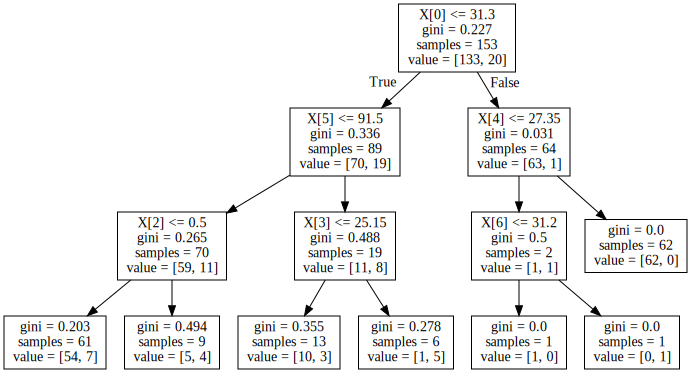

In [ ]:
import graphviz
from IPython.display import display
display(graphviz.Source(export_graphviz(treeclf)))

# Model Checking

In [ ]:
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,Kemayoran_Tx,0.250174
1,Bogor_Tx,0.000000
2,Kemayoran_ddd_car_N,0.146333
3,Bogor_Tavg,0.255860
4,Kemayoran_Tavg,0.083145
5,Bogor_RH_avg,0.178660
6,TJP_Tx,0.085827
7,Bogor_ddd_car_N,0.000000
8,Bogor_ss,0.000000
9,Kemayoran_ddd_car_NW,0.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
treeclf2 = DecisionTreeClassifier()

treeclf2 = treeclf2.fit(X_train,y_train)

y_pred = treeclf2.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.782608695652174


# Model Building (Take 2)

We only take accounts the column that has importance greater than 0.05 in the first model

In [ ]:
feature_cols = ['Kemayoran_Tx', 'Kemayoran_ddd_car_N ', 'Bogor_Tavg', 'Kemayoran_Tavg', 'Bogor_RH_avg', 'TJP_Tx']
X = data_4[feature_cols]
y = data_4.status_banjir

from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

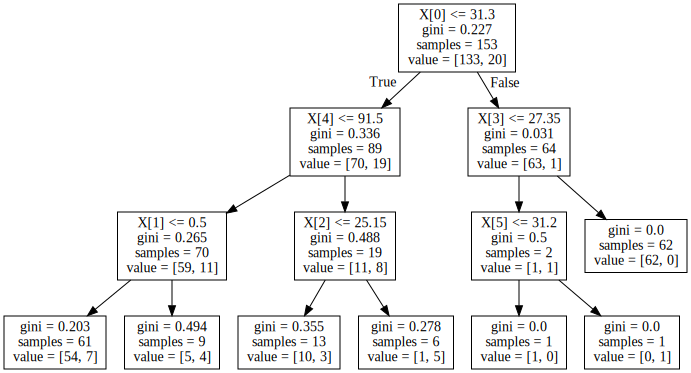

In [ ]:
from sklearn.tree import export_graphviz
with open("A", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols)

import graphviz
from IPython.display import display
display(graphviz.Source(export_graphviz(treeclf)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
treeclf2 = DecisionTreeClassifier()

treeclf2 = treeclf2.fit(X_train,y_train)

y_pred = treeclf2.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.782608695652174


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
treeclf2 = DecisionTreeClassifier()

treeclf2 = treeclf2.fit(X_train,y_train)

y_pred = treeclf2.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7608695652173914


In [ ]:
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,Kemayoran_Tx,0.250174
1,Kemayoran_ddd_car_N,0.146333
2,Bogor_Tavg,0.255860
3,Kemayoran_Tavg,0.083145
4,Bogor_RH_avg,0.178660
5,TJP_Tx,0.085827


In [ ]:
joblib.dump(treeclf2, 'final_model.joblib')

['final_model.joblib']

In [ ]:
import json

from flask import Flask, request

app = Flask(__name__)

final_model = joblib.load('final_model.joblib')

@app.route('/')
def hello():
  return "Hello, World!"

@app.route('/predict', methods = ["POST"])
def predict():
  request_json = request.request_json
  print("data: {}".format(request_json))
  print("type: {}".format(type(request_json)))

  prediction = final_model.predict(request_json.get('data'))
  prediction_string = [str(d) for d in prediction]
  response_json = {
      "data" : request_json.get("data"),
      "prediction" : list(prediction_string)
  }

  return json.dumps(response_json)

if __name__ == '__main__':
  app.run(host='0.0.0.0', port = 5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
